# 2 Monte Carlo Model

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_model(Np, Nt, T, r, sigma, K, S0, option_type="call", graph="no"):
    """    
    Parameters:
    Np         : number of paths (simulations) for the Monte Carlo simulation
    Nt         : number of time steps in each path
    T          : time to maturity (in years)
    r          : risk-free interest rate (annualized)
    sigma      : volatility of the stock 
    K          : strike price of the option
    S0         : initial stock price
    option_type: "call" or "put", default is "call"
    graph      : "yes" or "no", default is "yes"
    """
   
    # dt = Time step
    dt = T / Nt  # time step

    # Generating the random numbers for the price paths
    Z = np.random.normal(0, 1, (Np, Nt))
    dB = np.sqrt(dt) * Z
    
    # Initialising the stock price matrix
    S = np.zeros((Np, Nt+1))
    S[:, 0] = S0  # initial stock price
    
    # Loop to simulate the stock price paths
    for i in range(1, Nt+1):
        S[:, i] = S[:, i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dB[:, i-1])

    # Stock price at maturity
    ST = S[:, -1]  

    # Call option price calculation
    if option_type == "call":
        payoffs = np.exp(-r * T) * np.maximum(ST - K, 0)
    elif option_type == "put":
        payoffs = np.exp(-r * T) * np.maximum(K - ST, 0)
    else:
        raise ValueError("option_type must be either 'call' or 'put'")

    # Calcualting mean option price
    option_price = np.mean(payoffs)

    # Standard deviation (error calculation)
    error = np.std(payoffs) / np.sqrt(Np)
    
    # Plotting all the paths if graph is enabled
    if graph == "yes":
        plt.figure(figsize=(10,6))
         # For loop to plot all paths
        for i in range(Np):  
            plt.plot(np.linspace(0, T, Nt+1), S[i, :], lw=0.75, alpha=0.75)

        # Adding labels and title
        plt.title(f'Monte Carlo Simulation of {Np} Stock Price Paths')
        plt.xlabel('Time (Years)')
        plt.ylabel('Stock Price')
        plt.xticks(np.arange(0, T+1, 1))  # Set the x-axis to show only integer values

        # Show the plot
        plt.show()

    # Print results
    print(f"Monte Carlo {option_type.capitalize()} Option Price:", round(option_price, 2), "with error:", round(error, 2))

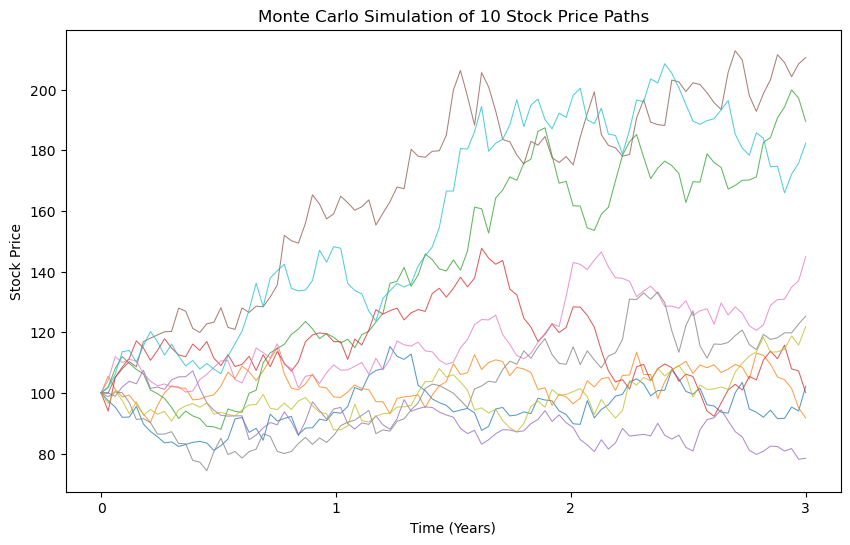

Monte Carlo Call Option Price: 32.42 with error: 10.87


In [7]:
# Example of Monte Carlo Model

monte_carlo_model(Np=10, Nt=100, T=3, r=0.05, sigma=0.2, K=100, S0=100, option_type="call", graph="yes")